In [ ]:
%pip install sklearn-hierarchical-classification
!pip install scikit-multilearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_multilabel_classification
from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
from sklearn_hierarchical_classification.constants import ROOT
import json
import os
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from skmultilearn.adapt import MLkNN
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
from sklearn_hierarchical_classification.constants import ROOT
from networkx import DiGraph
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

!pip install transformers

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-hierarchical-classification: filename=sklearn_hierarchical_classification-1.3.2-py3-none-any.whl size=16916 sha256=a7b93d6cf4aa72413611165e4fafc33aa39f22bc4e446af92e749bf691cc97db
  Stored in directory: /root/.cache/pip/wheels/87/09/e3/1619c1a173b533be37bda720b5f5aaa719e116d66ff7c01a12
Successfully built sklearn-hierarchical-classification
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
import json
###CONTROLLO SEZIONE NON FONDAMENETALE
def count_labels(data, label_names):
    count = {label: 0 for label in label_names}

    for element in data:
        if 'labels' in element:
            for label in element['labels']:
                if label in count:
                    count[label] += 1

    return count

# Leggi il file JSON
test_data = read_json_file("dev_subtask1_en.json")

# Etichette di interesse
label_names_of_interest = ["Whataboutism", "Presenting Irrelevant Data (Red Herring)", "Misrepresentation of Someone's Position (Straw Man)"]

# Conta le etichette di interesse nel campo "labels"
label_counts = count_labels(test_data, label_names_of_interest)

# Stampa i risultati
for label, count in label_counts.items():
    print(f"{label}: {count}")


NameError: name 'read_json_file' is not defined

In [ ]:
!pip install Cython==0.29.36
!pip uninstall scipy -y
!pip install scipy==1.9
!pip uninstall pyparsing -y
!pip install pyparsing==2.4
!pip uninstall scikit_learn -y
!pip uninstall imbalanced-learn -y
!pip uninstall mlxtend -y
!pip uninstall yellowbrick -y


In [ ]:
!pip install scikit-learn==0.24.2 --no-build-isolation

In [ ]:
#0
"""
!pip install auto-sklearn
from pprint import pprint

import pandas as pd
import sklearn.metrics
from sklearn.datasets import fetch_20newsgroups

import autosklearn.classification
"""
import re
# serie di 4 funzioni per la suddivisione del dataset secondo etichette
def find_descendants(graph, labels):
    descendants = set()

    def dfs(node):
        descendants.add(node)
        [dfs(child) for child in graph.successors(node)]

    [dfs(label) for label in labels]
    return descendants

def filter_matrix_by_labels(X, y, labels, graph):
    descendants_set = find_descendants(graph, labels)

    filtered_X, filtered_labels = zip(*[(X[i], list(set(labels_list) & descendants_set)) for i, labels_list in enumerate(y) if set(labels_list) & descendants_set])

    return np.vstack(filtered_X), list(filtered_labels)

def find_ancestor_in_labels(graph, node, target_labels):
    ancestors = set()

    def dfs(current):
        ancestors.add(current)
        [dfs(pred) for pred in graph.predecessors(current)]

    [dfs(predecessor) for predecessor in graph.predecessors(node)]

    common_ancestors = ancestors & set(target_labels)
    return list(common_ancestors)[0] if common_ancestors else None

def transform_Y_with_ancestors(graph, Y, target_labels):
    return [list(set([find_ancestor_in_labels(graph, label, target_labels) or label for label in labels_list])) for labels_list in Y]
###############################


def fit_classifier(X_Train, y_Train, G, labels_to_check, classifier, vectorizer):
    X, Y = filter_matrix_by_labels(X_train, y_train, labels_to_check, G)
    new_Y = transform_Y_with_ancestors(G, Y, labels_to_check)
    Y = Binarizzatore_etichette(labels_to_check, new_Y)
    X_tfidf = vectorizer.transform(X.flatten().tolist())

    return classifier.fit(X_tfidf, Y)


def Binarizzatore_etichette(lista_stringhe, lista_liste):
    # Inizializza la matrice con zeri
    matrice = [[0] * len(lista_stringhe) for _ in range(len(lista_liste))]

    # Riempie la matrice con 1 dove una stringa è presente nella lista di liste
    for i, lista in enumerate(lista_liste):
        for j, stringa in enumerate(lista_stringhe):
            if stringa in lista:
                matrice[i][j] = 1

    return matrice

def Etichette_da_Binarizzatore(lista_stringhe, matrice_binarizzatore):
    # Inizializza la lista di liste per le etichette
    lista_liste = [[] for _ in range(len(matrice_binarizzatore))]

    # Riempie la lista di liste con le etichette corrette
    for i, riga in enumerate(matrice_binarizzatore):
        for j, valore in enumerate(riga):
            if valore == 1:
                lista_liste[i].append(lista_stringhe[j])

    return lista_liste


def read_json_file(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        return data
    else:
        return None


def check_errors(graph, binary_vector, predicted_labels, true_labels):
    for pred_label, pred_value in zip(predicted_labels, binary_vector):
        if pred_value == 1 and not any(nx.has_path(graph.reverse(), label, pred_label) for label in true_labels):
            return False
        elif pred_value == 0 and pred_label in true_labels:
            return False

    return True  # Se non ci sono errori, restituisce True


def clean_text(text):
   if text == "" or text == None:
      return "Blank"
  # Remove escape sequences and replace "\\n" with a space
   cleaned_text = re.sub(r'\\n', ' ', text)
  # Remove any other special characters or patterns as needed
   cleaned_text = re.sub(r'[^A-Za-z0-9\s]', '', cleaned_text)
   return cleaned_text

In [ ]:
#1
G = DiGraph()
G.add_edge(ROOT, "non_propagandistic")
G.add_edge(ROOT, "propagandistic")

np.set_printoptions(threshold=np.inf)
# Leggi train.json
train_data = read_json_file("train.json")

# Leggi validation.json
validation_data = read_json_file("val.json")

#test_data = read_json_file("dev_subtask2b_en.json")
test_data = read_json_file("dev_unlabeled.json")

# Inizializza le liste per i dati di addestramento
texts_train, labels_train = [], []
texts_validation, labels_validation = [], []
texts_test, labels_test = [], []
texts_test_vero, labels_test_vero = [], []
if train_data:
    texts_train = [element['text'] for element in train_data]
    #texts_train = [clean_text(element['text']) for element in train_data]
    labels_train = [element['label'] if element['label'] else ['Free'] for element in train_data]

# Estrai x e y dai dataset se esistono
if validation_data:
    texts_validation = [element['text'] for element in validation_data]
    #texts_validation = [clean_text(element['text']) for element in validation_data]
    labels_validation = [element['label'] if element['label'] else ['Free'] for element in validation_data]

if test_data:
    texts_test = [element['text'] for element in test_data]
    #texts_test = [clean_text(element['text']) for element in test_data]
    labels_test = [element['label'] if element['label'] else ['Free'] for element in test_data]

# Unisce i dati di addestramento e validation
texts = texts_train + texts_validation
labels = labels_train + labels_validation


"""
# Divide dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)  # , stratify=results
"""
####### nuova sezione per avere validation.json come gold
X_test = texts_test
y_test = labels_test
X_train = texts
y_train = labels

In [ ]:
#2

problematic_indices = [i for i, text in enumerate(X_train) if text is None]
print("Problematic Indices:", problematic_indices)

# Rimuovi gli elementi problematici sia da X_train che da y_train
X_train = [X_train[i] for i in range(len(X_train)) if i not in problematic_indices]
y_train = [y_train[i] for i in range(len(y_train)) if i not in problematic_indices]


vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_test = vectorizer.transform(X_test)
X_train = vectorizer.transform(X_train)
# Definizione dei classificatori
Free_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
Y = Binarizzatore_etichette(["non_propagandistic","propagandistic"], y_train)

Free_classifier.fit(X_train, Y)

y_prediction = Free_classifier.predict(X_test)
indices_to_replace = np.all(y_prediction == [1, 1], axis=1)

y_prediction[indices_to_replace] = [1, 0]
y_gold = Binarizzatore_etichette(["non_propagandistic","propagandistic"], y_test)
y_pred = Etichette_da_Binarizzatore(["non_propagandistic","propagandistic"], y_prediction)

Problematic Indices: [7034]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcola le metriche
precision = precision_score(y_gold, y_pred, average='weighted')
recall = recall_score(y_gold, y_pred, average='weighted')
f1 = f1_score(y_gold, y_pred, average='weighted')

# Stampa i risultati
print("f1={:.5f}\tprecision={:.5f}\trecall={:.5f}".format(f1, precision, recall))


ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

In [ ]:
import copy

# Creazione di copie profonde per evitare riferimenti condivisi
validation_data_aux = copy.deepcopy(test_data)

# Sostituisci i valori del campo 'labels' di validation_data_aux con quelli di aux
for i, element in enumerate(validation_data_aux):
    element["label"] = y_pred[i]


# Salva il nuovo validation_data modificato in un file pred.json
output_file_path = "pred4.json"
with open(output_file_path, "w", encoding='utf-8') as output_file:
    json.dump(validation_data_aux, output_file, indent=2)

In [ ]:
#3
from sklearn.metrics import f1_score

macro_f1 = f1_score(y_gold, y_prediction, average="macro", zero_division=1)
micro_f1 = f1_score(y_gold, y_prediction, average="micro", zero_division=1)

print("macro-F1={:.5f}\tmicro-F1={:.5f}".format(macro_f1, micro_f1))


macro-F1=0.59823	micro-F1=0.88866


In [ ]:
import json   ##REAL 3
from sklearn.metrics import f1_score

def Binarizzatore_etichette(lista_stringhe, lista_liste):
    # Inizializza la matrice con zeri
    matrice = [[0] * len(lista_stringhe) for _ in range(len(lista_liste))]

    # Riempie la matrice con 1 dove una stringa è presente nella lista di liste
    for i, lista in enumerate(lista_liste):
        for j, stringa in enumerate(lista_stringhe):
            if stringa in lista:
                matrice[i][j] = 1

    return matrice

def process_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    labels_list = []
    for element in data:
        label = element['label']
        if isinstance(label, list) and len(label) == 1:
            label = label[0]  # Estrae l'elemento dalla lista se è l'unico elemento
        labels_list.append([label])

    binary_labels = Binarizzatore_etichette(["non_propagandistic", "propagandistic"], labels_list)

    return binary_labels, labels_list

# Sostituisci 'file1.json' e 'file2.json' con i percorsi effettivi dei tuoi file JSON.
#file1_path = 'dev_subtask2b_en.json'
file1_path = 'dev_unlabeled.json'
#file2_path = 'predictions_TinyLlama_TinyLlama-1.1B-Chat-v1.0_openai_clip-vit-large-patch14_2_None_8_8_0.2_True.json'
file2_path = 'pred4.json'
y_gold, aaa = process_json_file(file1_path)
y_prediction, bbb = process_json_file(file2_path)

macro_f1 = f1_score(y_gold, y_prediction, average="macro", zero_division=1)
micro_f1 = f1_score(y_gold, y_prediction, average="micro", zero_division=1)

print("macro-F1={:.5f}\tmicro-F1={:.5f}".format(macro_f1, micro_f1))

macro-F1=0.54742	micro-F1=0.80462


In [ ]:
import json
import copy

# Funzione per sostituire le istanze di "\u00e9" con "é"
def replace_unicode(data):
    if isinstance(data, str):
        return data.replace('\u00e9', 'é')
    elif isinstance(data, list):
        return [replace_unicode(item) for item in data]
    elif isinstance(data, dict):
        return {key: replace_unicode(value) for key, value in data.items()}
    else:
        return data

# Creazione di copie profonde per evitare riferimenti condivisi
validation_data_aux = copy.deepcopy(test_vero_data)

# Sostituisci i valori del campo 'labels' di validation_data_aux con quelli di aux
for i, element in enumerate(validation_data_aux):
    element["labels"] = y_pred[i]

# Applica la sostituzione alle etichette nel formato richiesto
formatted_data = [replace_unicode(item) for item in validation_data_aux]

# Salva il nuovo validation_data modificato in un file pred.json
output_file_path = "pred6.json"
with open(output_file_path, "w", encoding='utf-8') as output_file:
    output_file.write(json.dumps(formatted_data, indent=2, separators=(',', ':')))


 ############################################## INIZIO SEZIONE TEST #################################

In [ ]:
import json
from sklearn.metrics import f1_score

def Binarizzatore_etichette(lista_stringhe, lista_liste):
    # Inizializza la matrice con zeri
    matrice = [[0] * len(lista_stringhe) for _ in range(len(lista_liste))]

    # Riempie la matrice con 1 dove una stringa è presente nella lista di liste
    for i, lista in enumerate(lista_liste):
        for j, stringa in enumerate(lista_stringhe):
            if stringa in lista:
                matrice[i][j] = 1

    return matrice

def process_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    labels_list = []
    for element in data:
        labels_list.append([element['label']])

    binary_labels = Binarizzatore_etichette(["non_propagandistic", "propagandistic"], labels_list)

    return binary_labels, labels_list

def process_json_file2(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    labels_list = []
    for element in data:
        labels_list.append(element['label'])

    binary_labels = Binarizzatore_etichette(["non_propagandistic", "propagandistic"], labels_list)

    return binary_labels, labels_list

# Sostituisci 'file1.json' e 'file2.json' con i percorsi effettivi dei tuoi file JSON.
file1_path = 'dev_subtask2b_en.json'
#file1_path = 'dev_unlabeled.json'
file2_path = 'predictions_TinyLlama_TinyLlama-1.1B-Chat-v1.0_openai_clip-vit-large-patch14_2_None_8_8_0.2_True.json'
#file2_path = 'b-w clean plus (giusto).json'
#file2_path = 'pred4.json'
y_gold, aaa = process_json_file(file1_path)
y_prediction, bbb = process_json_file2(file2_path)

macro_f1 = f1_score(y_gold, y_prediction, average="macro", zero_division=1)
micro_f1 = f1_score(y_gold, y_prediction, average="micro", zero_division=1)

print("macro-F1={:.5f}\tmicro-F1={:.5f}".format(macro_f1, micro_f1))


macro-F1=0.40000	micro-F1=0.66667


In [ ]:
def get_misclassified_indices(y_gold, y_prediction):
    misclassified_indices = []
    for i, (gold, pred) in enumerate(zip(y_gold, y_prediction)):
        if gold != pred:
            misclassified_indices.append(i)
    return misclassified_indices

def get_sentences_and_labels(file_path, indices):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    sentences_and_labels = []
    for i in indices:
        sentence = data[i]['text']  # Assuming the JSON has a 'sentence' field for sentences
        label = data[i]['label']
        sentences_and_labels.append((sentence, label))

    return sentences_and_labels

# Get misclassified indices
misclassified_indices = get_misclassified_indices(y_gold, y_prediction)

# Get sentences and labels for misclassified indices from the gold data file
misclassified_sentences_gold = get_sentences_and_labels(file1_path, misclassified_indices)

# Get labels for misclassified indices from the predicted data file
misclassified_labels_pred = [bbb[i] for i in misclassified_indices]

# Print misclassified sentences with their gold and predicted labels
for i, idx in enumerate(misclassified_indices):
    print(f"Index: {idx+1}")
    print(f"Sentence: {misclassified_sentences_gold[i][0]}")
    print(f"Gold Label: {misclassified_sentences_gold[i][1]}")
    #print(f"Predicted Label: {misclassified_labels_pred[i]}")
    print("-" * 50)


Index: 20
Sentence: It's a surprise tool that will help us later
Gold Label: non_propagandistic
--------------------------------------------------
Index: 28
Sentence: JOSEPH STEALIN!
Gold Label: non_propagandistic
--------------------------------------------------
Index: 41
Sentence: ONE DOWN, ONE TO GO
Gold Label: non_propagandistic
--------------------------------------------------
Index: 46
Sentence: IS THAT CONFETTI OR 30000 SHREDDED EMAILS?\n
Gold Label: non_propagandistic
--------------------------------------------------
Index: 50
Sentence: WHAT DO I FEEL WHEN I SHOOT A FASCIST?\n\nRECOIL
Gold Label: propagandistic
--------------------------------------------------
Index: 53
Sentence: I miss him more with every passing day
Gold Label: non_propagandistic
--------------------------------------------------
Index: 54
Sentence: IS EUROPE AWAKENING TO THE MUSLIM INVASION?
Gold Label: non_propagandistic
--------------------------------------------------
Index: 59
Sentence: PUTIN'S ANNE

In [ ]:
!pip install seaborn matplotlib scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Esempio di etichette originali

# Trasforma le etichette in vettori binari
label_encoder = LabelEncoder()
etichette_binarie = label_encoder.fit_transform(aaa)

# Sostituisci questi due vettori con i tuoi risultati effettivi e previsti
y_true = etichette_binarie
etichette_binarie = label_encoder.transform(bbb)
y_pred = etichette_binarie  # Esempio di vettore predetto

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_true, y_pred)

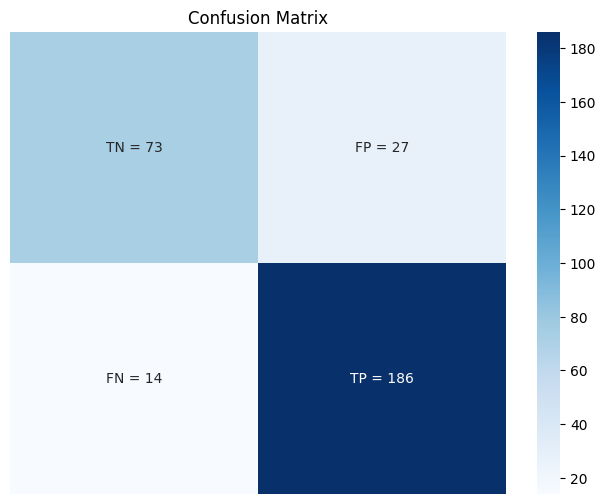

In [ ]:
conf_matrix = [[73, 27], [14, 186]]

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_labels = [["TN = 73", "FP = 27"], ["FN = 14", "TP = 186"]]

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=conf_matrix_labels, fmt="", cmap="Blues", xticklabels=[], yticklabels=[])

#plt.xlabel("Predicted Labels")
#plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import json
def Binarizzatore_etichette(lista_stringhe, lista_liste):
    # Inizializza la matrice con zeri
    matrice = [[0] * len(lista_stringhe) for _ in range(len(lista_liste))]

    # Riempie la matrice con 1 dove una stringa è presente nella lista di liste
    for i, lista in enumerate(lista_liste):
        for j, stringa in enumerate(lista_stringhe):
            if stringa in lista:
                matrice[i][j] = 1

    return matrice
def process_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    binary_labels = []
    for element in data:
        labels_test = [element['label'] for element in data]
        binary_labels = Binarizzatore_etichette(["non_propagandistic","propagandistic"], labels_test)


    return binary_labels, labels_test

# Sostituisci 'file1.json' e 'file2.json' con i percorsi effettivi dei tuoi file JSON.
file1_path = 'dev_unlabeled.json'
#file1_path = 'dev_subtask2b_en.json'
file2_path = 'predictions_TinyLlama_TinyLlama-1.1B-Chat-v1.0_openai_clip-vit-large-patch14_2_None_8_8_0.2_True.json'
#file2_path = 'pred4.json'
y_gold, aaa = process_json_file(file1_path)
y_prediction, bbb = process_json_file(file2_path)

from sklearn.metrics import f1_score

macro_f1 = f1_score(y_gold, y_prediction, average="macro", zero_division=1)
micro_f1 = f1_score(y_gold, y_prediction, average="micro", zero_division=1)

print("macro-F1={:.5f}\tmicro-F1={:.5f}".format(macro_f1, micro_f1))

macro-F1=0.50000	micro-F1=0.91036
